In [64]:
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
df_raw = pd.read_csv('/content/data_phdosado.csv', index_col=1, engine='python', on_bad_lines='skip') # Colab
# df = pd.read_csv('../data/data_phdosado.csv', index_col=1) # Local

In [78]:
# Check for nulls
df_raw.isnull().sum()

,0
ID,0
Real_RD_PV_pHDosado,89
Real_RD_MV_ValvulaCalpHDosado,97
Real_RD_PV_VazaoDosado,64
Real_RD_ST_LimpezaPHmetro,99
Real_RD_PV_BaumeCal,89
Real_RD_PV_PressaoLinhaCal,88
Real_RD_MV_ValvulaCalpHDosado-2,97
Real_RD_MV_PressaoLinhaCal,51
Real_RD_PV_NivelTqCal,92


In [79]:
list(df_raw.columns)

['ID',
 'Real_RD_PV_pHDosado',
 'Real_RD_MV_ValvulaCalpHDosado',
 'Real_RD_PV_VazaoDosado',
 'Real_RD_ST_LimpezaPHmetro',
 'Real_RD_PV_BaumeCal',
 'Real_RD_PV_PressaoLinhaCal',
 'Real_RD_MV_ValvulaCalpHDosado-2',
 'Real_RD_MV_PressaoLinhaCal',
 'Real_RD_PV_NivelTqCal',
 'Real_RD_PV_NivelTqDosado']

In [80]:
df_raw.head()


,ID,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_BaumeCal,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_ValvulaCalpHDosado-2,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
timezone,,,,,,,,,,,
2024-07-13 14:28:22,393652,7.1260,37.128124,899.625,0.0,20.454374,0.798437,37.128124,74.546875,98.31250,73.84375
2024-07-13 14:28:25,393653,7.1225,37.178123,899.625,0.0,20.454374,0.798437,37.178123,74.578125,98.34375,73.87500
2024-07-13 14:28:28,393654,7.1225,37.187500,899.625,0.0,20.454374,0.796875,37.187500,74.559375,98.40625,73.87500
2024-07-13 14:28:31,393655,7.1260,37.331249,899.625,0.0,20.454374,0.798437,37.331249,74.596875,98.50000,73.84375
2024-07-13 14:28:34,393656,7.1225,37.218750,900.375,0.0,20.454374,0.798437,37.218750,74.562500,98.25000,73.87500


## Pré-processamento

In [81]:
minute = 20 # Observações por minuto
hour = minute * 60
day = hour * 24

In [82]:
df = df_raw.dropna() # Drop nulls
df = df.tail(day * 10) # Seleciona apenas os últimos dez dias
df = df.drop(columns=['ID', 'Real_RD_PV_BaumeCal']) # Features não usadas
df.head()

,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_ValvulaCalpHDosado-2,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
timezone,,,,,,,,,
2024-09-01 22:16:02,7.5110,40.787498,1049.625,0.0,0.800000,40.787498,80.568750,98.65625,74.46875
2024-09-01 22:16:05,7.5110,40.896873,1048.500,0.0,0.800000,40.896873,80.568750,98.59375,74.31250
2024-09-01 22:16:08,7.5110,41.053123,1049.625,0.0,0.798437,41.053123,80.593750,98.65625,74.09375
2024-09-01 22:16:11,7.5075,41.131248,1050.000,0.0,0.795313,41.131248,80.609375,98.59375,74.09375
2024-09-01 22:16:14,7.5075,41.193748,1050.000,0.0,0.793750,41.193748,80.634375,98.53125,73.93750


In [83]:
# Normalização
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [84]:
# Porcentagem usada para treinar o modelo
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))

step = 1

# Usaremos os dados da última hora para prever 5 minutos
past = hour
future = minute * 5

learning_rate = 0.001
batch_size = 256
epochs = 10

In [85]:
train_data = normalized_df.loc[0 : train_split - 1]
val_data = normalized_df.loc[train_split:]

In [86]:
normalized_df

,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_ValvulaCalpHDosado-2,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
0,0.510448,0.407875,0.837935,0.0,0.553151,0.407875,0.423405,0.904401,0.712759
1,0.510448,0.408969,0.837035,0.0,0.553151,0.408969,0.423405,0.902737,0.711141
2,0.510448,0.410531,0.837935,0.0,0.552017,0.410531,0.424147,0.904401,0.708874
3,0.509851,0.411312,0.838235,0.0,0.549751,0.411312,0.424611,0.902737,0.708874
4,0.509851,0.411937,0.838235,0.0,0.548617,0.411937,0.425352,0.901073,0.707255
...,...,...,...,...,...,...,...,...,...
287995,0.529552,0.252062,0.668367,0.0,0.553151,0.252062,0.089114,0.958732,0.139832
287996,0.529552,0.252281,0.667767,0.0,0.553151,0.252281,0.089948,0.964057,0.140804
287997,0.529552,0.251969,0.668067,0.0,0.554284,0.251969,0.089484,0.968051,0.139832
287998,0.527761,0.252750,0.665966,0.0,0.556550,0.252750,0.087259,0.959398,0.138537


### Dataset de treinamento

In [87]:
# Dataset de treinamento
start = past + future
end = start + train_split

# x_train = train_data.values
x_train = train_data.drop(columns=['Real_RD_PV_pHDosado']).values

# y_train = normalized_df['Real_RD_PV_pHDosado'][:train_split - 1].values
y_train = normalized_df['Real_RD_PV_pHDosado'][start:end]

sequence_length = int(past / step)

In [88]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [89]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (205920, 8)
y_train shape: (205920,)


In [90]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 1200, 8)
Target shape: (256,)


### Dataset de validação

In [91]:
# Dataset de validação
x_end = len(val_data) - past - future
label_start = train_split + past + future

x_val = val_data.drop(columns=['Real_RD_PV_pHDosado']).iloc[:x_end].values
y_val = normalized_df['Real_RD_PV_pHDosado'][label_start:].values

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [92]:
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")

x_val shape: (80780, 8)
y_val shape: (80780,)


# Treinamento

## LSTM

In [61]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 32)                  │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,281 (20.63 KB)

 Trainable params: 5,281 (20.63 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
# lstm_out = keras.layers.LSTM(32)(inputs)
# # lstm_out = keras.layers.Dense(32)(inputs)
# outputs = keras.layers.Dense(1)(lstm_out)

# model = keras.Model(inputs=inputs, outputs=outputs)
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
# model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1200, 9)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,409 (21.13 KB)

 Trainable params: 5,409 (21.13 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

In [62]:
history = train_model(model)

Epoch 1/10
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0063
Epoch 1: val_loss improved from inf to 0.01106, saving model to model_checkpoint.weights.h5
800/800 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - loss: 0.0063 - val_loss: 0.0111
Epoch 2/10
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0032
Epoch 2: val_loss improved from 0.01106 to 0.01056, saving model to model_checkpoint.weights.h5
800/800 ━━━━━━━━━━━━━━━━━━━━ 77s 96ms/step - loss: 0.0032 - val_loss: 0.0106
Epoch 3/10
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0030
Epoch 3: val_loss improved from 0.01056 to 0.01045, saving model to model_checkpoint.weights.h5
800/800 ━━━━━━━━━━━━━━━━━━━━ 76s 95ms/step - loss: 0.0030 - val_loss: 0.0105
Epoch 4/10
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0029
Epoch 4: val_loss did not improve from 0.01045
800/800 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - loss: 0.0029 - val_loss: 0.0105
Epoch 5/10
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0029
Epoch 5: val_loss di

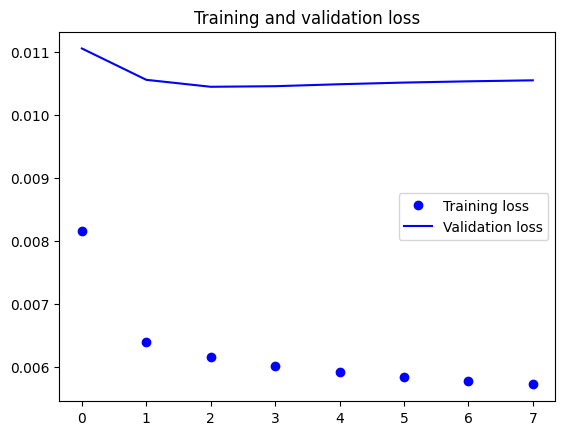

In [73]:
def plot_history(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plot_epochs = range(len(loss))

  plt.figure()

  plt.plot(plot_epochs, loss, 'bo', label='Training loss')
  plt.plot(plot_epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

plot_history(history)

## Camada LSTM com dropout

In [107]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [108]:
learning_rate = 0.001

model = models.Sequential()
model.add(layers.Input(shape=(inputs.shape[1], inputs.shape[2])))
model.add(layers.GRU(32,
                           dropout=0.2,
                           recurrent_dropout=0.2,
                           ))
model.add(layers.Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                          │ (None, 32)                  │           4,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,065 (15.88 KB)

 Trainable params: 4,065 (15.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
 18/800 ━━━━━━━━━━━━━━━━━━━━ 30:44 2s/step - loss: 0.1407

# Referências

- [Timeseries forecasting for weather prediction](https://keras.io/examples/timeseries/timeseries_weather_forecasting/)